In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Get data from John Hopkins CSSE Git Repository
# Rerun this daily to get updated statistics

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# Frequently updated local data source 
# url = 'https://raw.githubusercontent.com/digitalhumanitarians/COVID-19LK/master/time_series-covid-19-Confirmed.csv'
# lk_confirmed = pd.read_csv(url, error_bad_lines=False)

In [2]:
# check for last availble date => Maryland is 9:30 hrs behind local time
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

4/4/20


In [4]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum() 

In [4]:
# order by cases
# get top 10 countries => using first column as index
ccs=confirmedcountry.sort_values(by=last_date, ascending=False).head(10)
print('Confirmed Cases') 

print(ccs[['Country/Region',last_date]].to_string(index=False))

Confirmed Cases
 Country/Region  4/3/20
             US  275586
          Italy  119827
          Spain  119199
        Germany   91159
          China   82511
         France   65202
           Iran   53183
 United Kingdom   38689
         Turkey   20921
    Switzerland   19606


In [5]:
ccs.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
169,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,65778,83836,101657,121478,140886,161807,188172,213372,243453,275586
84,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827
154,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199
65,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511
61,France,44.4772,116.0351,0,0,2,3,3,3,4,...,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202
80,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183
173,United Kingdom,321.8262,-423.4011,0,0,0,0,0,0,0,...,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689
168,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,...,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921
159,Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,...,10897,11811,12928,14076,14829,15922,16605,17768,18827,19606


In [6]:
# sum of the deaths over countries
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [7]:
# # sum of the recoveries over countries
# recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [8]:
# order by cases 
# get top 10 countries => using first column as index
dcs=deathcountry.sort_values(by=last_date, ascending=False).head(10)
print('Deaths')

print(dcs[['Country/Region',last_date]].to_string(index=False)) 

Deaths
 Country/Region  4/3/20
          Italy   14681
          Spain   11198
             US    7087
         France    6520
 United Kingdom    3611
          China    3326
           Iran    3294
    Netherlands    1490
        Germany    1275
        Belgium    1143


In [9]:
# order by recoveries 
# get top 10 countries => using first column as index
# rcs=recovercountry.sort_values(by=last_date, ascending=False).head(10)
# print("Recoveries")

# print(rcs[["Country/Region", last_date]].to_string(index=False))

In [10]:
# top 10 countries by cases
countries=ccs['Country/Region'].values
print(countries)

['US' 'Italy' 'Spain' 'Germany' 'China' 'France' 'Iran' 'United Kingdom'
 'Turkey' 'Switzerland']


In [11]:
# top 10 countries by deaths
dcountries=dcs['Country/Region'].values
print(dcountries)

['Italy' 'Spain' 'US' 'France' 'United Kingdom' 'China' 'Iran'
 'Netherlands' 'Germany' 'Belgium']


In [12]:
# top 10 countries by recoveries
# rcountries=rcs["Country/Region"].values
# print(rcountries)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


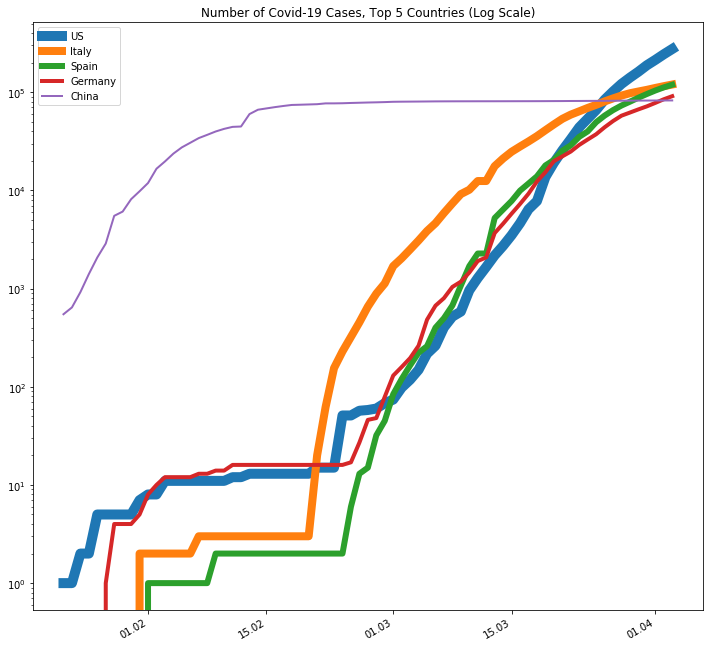

In [13]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) # => change this if when running local data
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

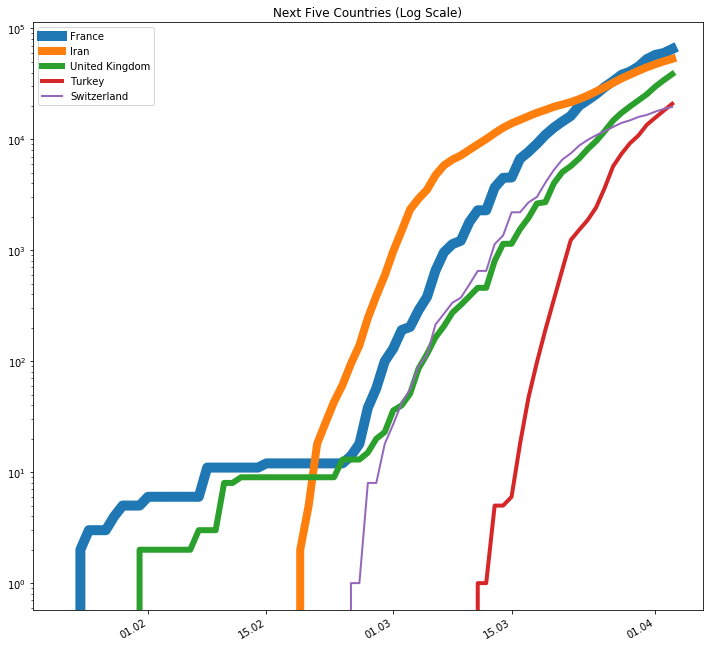

In [14]:
# next 5 countries by number of confirmed cases (5-10) => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Next Five Countries (Log Scale)')
    i=i+1
plt.show()

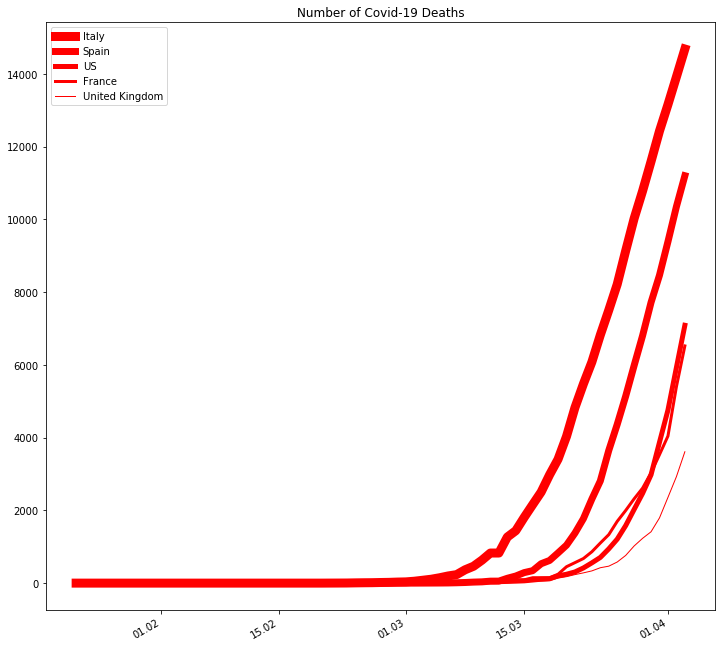

In [15]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='red')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

In [16]:
# top 5 countries by number of recoveries => Log scale

# fig, ax = plt.subplots(figsize=(12, 12)) 
# i=1
# for country in rcountries[0:5]:
#     scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
#     ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='green')
#     myFmt = DateFormatter("%d.%m")
#     ax.xaxis.set_major_formatter(myFmt)
#     fig.autofmt_xdate()
#     ax.legend(loc='upper left')
#     ax.set_title('Number of Covid-19 Recoveries')
#     i=i+1
# plt.show()

In [17]:
# cases in Sri Lanka
sldata=confirmed.loc[confirmed['Country/Region']=='Sri Lanka'].values[:,4:][0]
print(sldata)

# updated cases from local source
# sldata = lk_confirmed.loc[lk_confirmed['Location']=='IDH'].values[:,1:][0]
# print(sldata)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 6 10 18 28 44 51 60 73 77 82 97 102 102 106
 106 113 117 122 143 146 151 159]


In [18]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(sldata.size).reshape(-1,1)

# degree => 7 
quad = PolynomialFeatures(degree=8)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, sldata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# next 14 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, sldata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(sldata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[ 0.00000000e+00 -5.91248597e+00  1.84358256e+00 -2.20582878e-01
  1.29804596e-02 -4.12505023e-04  7.19052940e-06 -6.44942886e-08
  2.32431852e-10]

R^2 = 0.9928009697242448


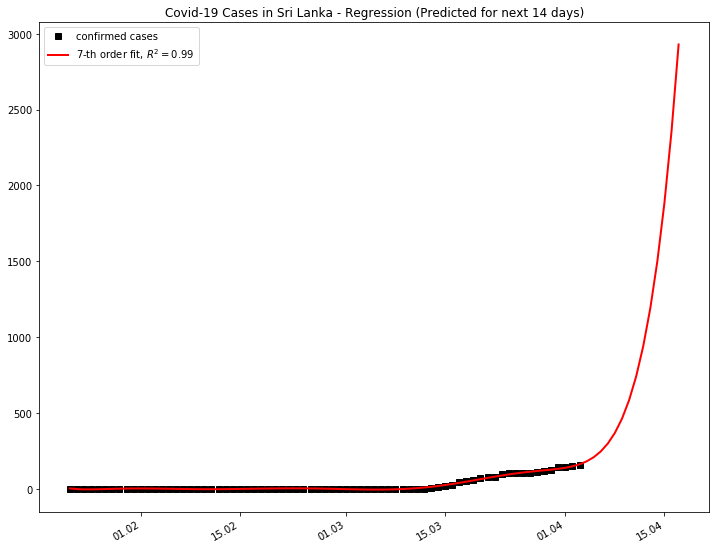

In [20]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,sldata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=2)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in Sri Lanka - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()